# Abalone Project

In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
import warnings
import requests
warnings.filterwarnings("ignore")
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv", index_col=False) #reading csv raw data
data.head()  # printing the first rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
(data.Height==0).sum()        # checking there are any '0' value for the parameter 'Height'

2

* There are 2 fields in height which have value '0'

In [4]:
data[data['Height']==0 ]                  

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


* There are two data set which has "0" value for the field Height

In [5]:
# Getting the aggregate of height based on the sex of the abalone

meanss = pd.pivot_table(data,index=['Sex'],aggfunc={'Height': np.mean})     
meanss

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


* The aggreate value for sex field 

In [6]:
data['Height']= data['Height'].replace(to_replace=0, value = 0.107996 )

* Replacing the empty values with the mean value of height based on the sex of the abalone

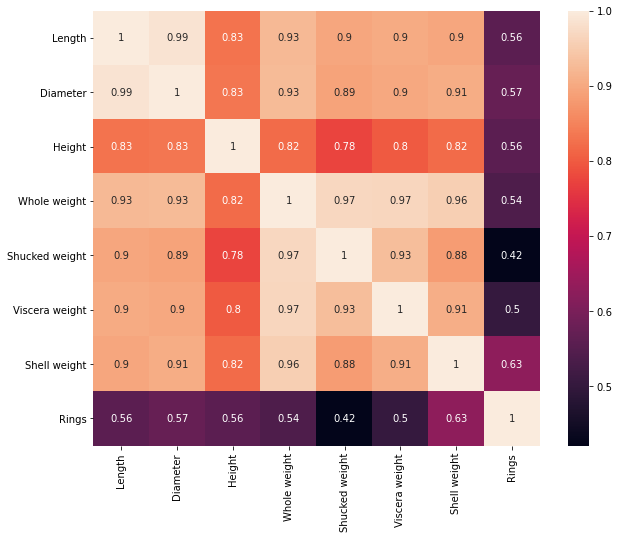

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True);

* Age is most linearly proprtional with Shell Weight followed by Diameter , length and height
* Age is least correlated with Shucked Weight

<Figure size 720x360 with 0 Axes>

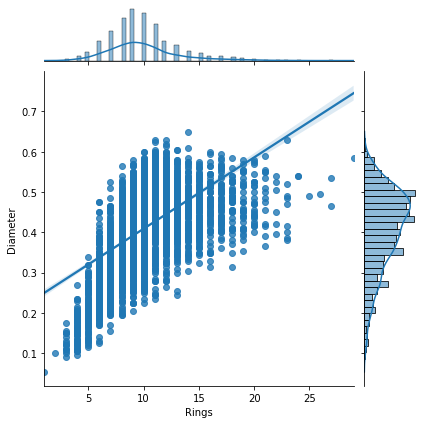

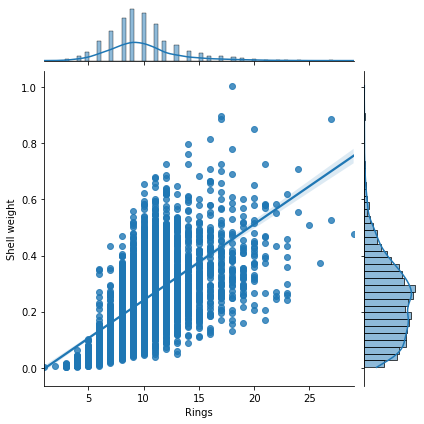

In [8]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=data, x='Rings', y='Diameter', kind='reg');
sns.jointplot(data=data, x='Rings', y='Shell weight', kind='reg');

* Analyzing the correlation matrix, we notice that Diameter and Shell weight are the attributes that most correlates to Rings. Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings

### Multivariate Analysis

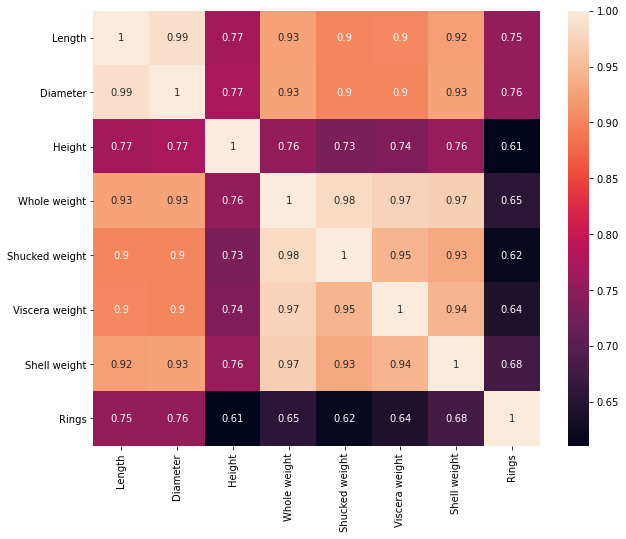

In [9]:
i_abalone = data[data['Rings'] < 10]

plt.figure(figsize=(10, 8))
corr = i_abalone.corr()
sns.heatmap(corr, annot=True);

* Based on the  analysis the correlation regarding the number of rings , the region delimited by Rings < 10 has greater correlation between the independent attributes and the target variable.

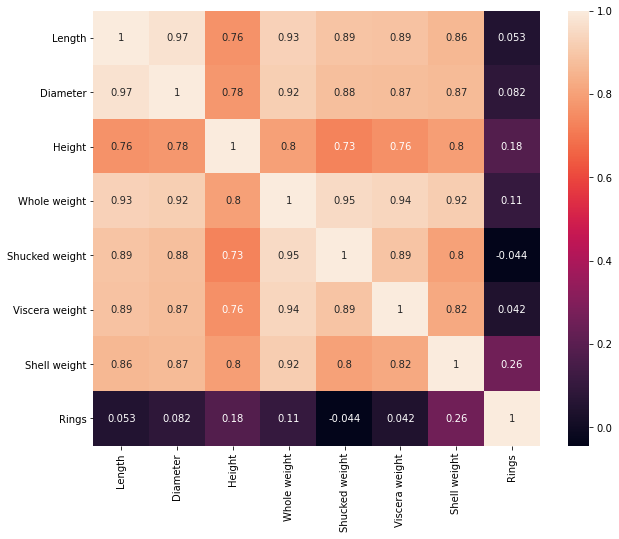

In [10]:
a_abalone = data[data['Rings'] >= 10]

plt.figure(figsize=(10, 8))
corr = a_abalone.corr()
sns.heatmap(corr, annot=True);

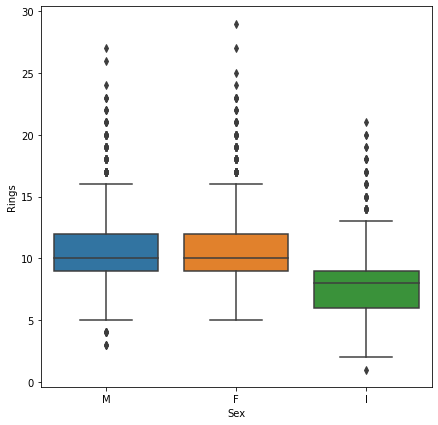

In [11]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Rings');

* The difference is that for Infant abalones the mean of Rings is lower.

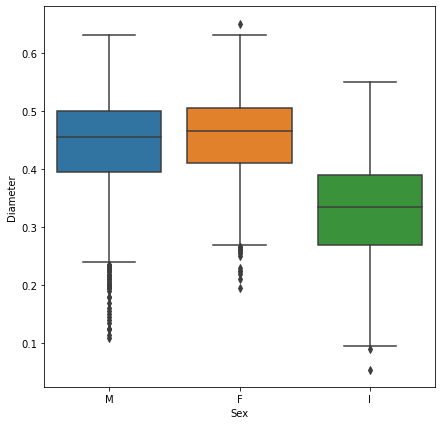

In [14]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Diameter');


* The dataset is distribuated around the mean and for Infant abalone the mean is low

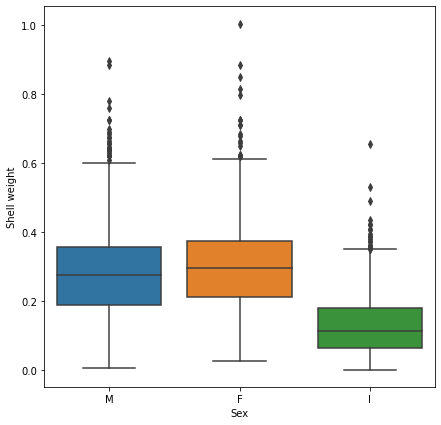

In [15]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Shell weight');

* We analyze how the sex categories influence the correlations Rings & Diameter and Rings & Shell weight. We already concluded that these attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Diamter and Shell weight have stronger correlation to rings.

<Figure size 1440x360 with 0 Axes>

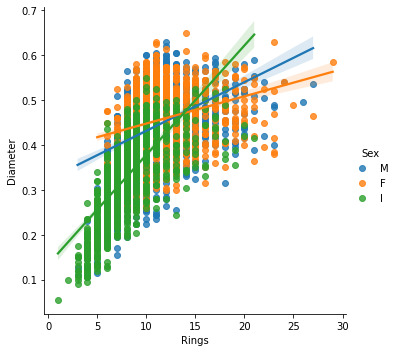

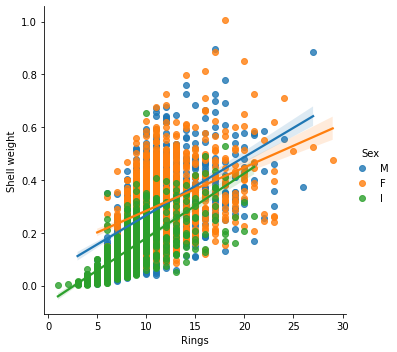

In [5]:
plt.figure(figsize=(20, 5))

sns.lmplot(data=data, x='Rings', y='Diameter', hue='Sex', fit_reg=True);
sns.lmplot(data=data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True);

* From the graph we can conclude that it is possible to predict the target value

In [6]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* From this we can assign infant=1, male=2 and female =0

#### Seperating dependent and independent variables

In [8]:
X = data.drop('Rings', axis = 1) # Input/independent variable
Y = data. Rings # Target / dependent variable

In [9]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.3, random_state = 42)

In [10]:
print(y_val.shape,y_train.shape, Y.shape)

(1254,) (2923,) (4177,)


In [11]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [15]:
pred = model.predict(X)
a=len(pred)
a


4177

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)  ## Split data for train and test.
print(Y_train.shape, Y_test.shape,Y.shape)

(2923,) (1254,) (4177,)


#### Building a model

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [29]:
model.fit(X_train,Y_train)

RandomForestClassifier()

* Train an estimator: model.fit(X_train,Y_train)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
y_pred_rf = model.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(Y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.39      0.54      0.45        13
           5       0.35      0.33      0.34        33
           6       0.38      0.36      0.37        73
           7       0.31      0.36      0.33       116
           8       0.32      0.36      0.34       166
           9       0.25      0.27      0.26       219
          10       0.25      0.31      0.28       201
          11       0.23      0.29      0.26       140
          12       0.19      0.09      0.12        85
          13       0.21      0.10      0.13        72
          14       0.12      0.05      0.07        39
          15       0.13      0.07      0.09        29
          16       0.06      0.06      0.06        17
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00  

* Now we predict using our trained model on the validation set we created i.e. X_val and evaluate our model on unforeseen data.

In [59]:
preds = model.predict(X_test)
print(preds[:1250])
print(Y_test[:1251].values)



[ 9 11  7 ... 10 10 10]
[10 11  6 ... 10 13  7]


* Make prediction on test dataset

In [38]:
preds = model.predict(X_test)
print(preds[:1254])
print(Y_test[:1254].values)

[ 9 11  7 ... 10  8  7]
[10 11  6 ... 10  7  9]


In [60]:
# To create Dataframe of predicted value with particular respective index
result = pd.DataFrame(preds) # target are nothing but the final predictions of your model on input features of your new unseen test data
# its important for comparison. Here "test_new" is your new test dataset
result['prediction']=preds
result

result.to_csv('Submission.csv')


,0,prediction
0,9,9
1,11,11
2,7,7
3,9,9
4,7,7
...,...,...
1249,10,10
1250,8,8
1251,10,10
1252,8,8
